In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [2]:
df_orig = pd.read_csv('final_data_files/uncrowded_everything_all_clipped.csv',index_col='id')
df_orig['mag_avg_3p6'] = np.nan
df_orig['merr_avg_3p6'] = np.nan
df_orig['mag_avg_4p5'] = np.nan
df_orig['merr_avg_4p5'] = np.nan

In [3]:
cal_dir = '../calibrated_files/'

colnames = [['als_id'],['x'],['y']]
colnames += [['mag_{}'.format(i), 'merr_{}'.format(i)] for i in range(1,15)]
colnames = sum(colnames, [])

for filt in ['3p6','4p5']:
    cal_files = glob.glob(cal_dir + '*{}um_rrl_matched_to_kaluzny.cal'.format(filt))
    for f in cal_files:
        mag = 'mag_avg_{}'.format(filt)
        merr = 'merr_avg_{}'.format(filt)
        df = pd.read_csv(f,delim_whitespace=True)
        df.Type = df.Type.str.split('RR').str.get(-1).astype(int)
        df.ID = df.ID.str.split('V').str.get(-1).astype(int)
        df_p = pd.read_csv(f.replace('_matched_to_kaluzny.cal','.raw'),delim_whitespace=True,
                           names=colnames)
        df_p.drop('mag_13',axis=1,inplace=True)
        df_p.drop('merr_13',axis=1,inplace=True)
        df_p.drop('mag_14',axis=1,inplace=True)
        df_p.drop('merr_14',axis=1,inplace=True)
        df_p[mag] = np.log10(np.mean(10**(df_p.filter(regex='mag_')),axis=1))
        df_p[merr] = np.sqrt(np.sum((df_p.filter(regex='merr_'))**2,axis=1))/12
        df_comb = df.merge(df_p,on='als_id')
        df_comb.index = df_comb.ID
        df_orig.update(df_comb[[mag,merr]])

(12.4, 14)

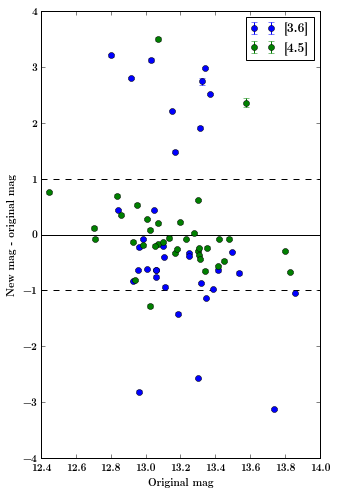

In [4]:
plt.subplots(1,1,figsize=(5,8))
plt.errorbar(df_orig.mag_3,df_orig.mag_avg_3p6 - df_orig.mag_3, df_orig.merr_avg_3p6.values, fmt='o', label='[3.6]')
plt.errorbar(df_orig.mag_4,df_orig.mag_avg_4p5 - df_orig.mag_4, df_orig.merr_avg_4p5.values, fmt='o', label='[4.5]')
plt.xlabel('Original mag')
plt.ylabel('New mag - original mag')
plt.hlines(0,12.4,14,linestyle='-')
plt.hlines(1,12.4,14,linestyle='--')
plt.hlines(-1,12.4,14,linestyle='--')
plt.legend()
plt.xlim(12.4,14)

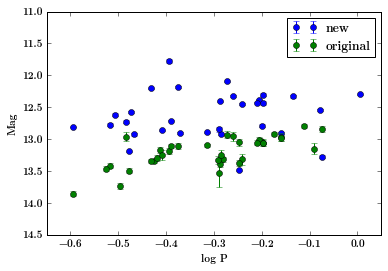

In [5]:
plt.subplots(1,1)
plt.errorbar(np.log10(df_orig.per), df_orig.mag_avg_3p6, df_orig.merr_avg_3p6.values, fmt='o', label='new')
plt.errorbar(np.log10(df_orig.per), df_orig.mag_3, df_orig.merr_3.values, fmt='o', label='original')
#plt.errorbar(np.log10(df_orig.per), df_orig.mag_avg_4p5, df_orig.merr_avg_4p5.values, fmt='o', label='[4.5]')
plt.ylim(14.5,11)
plt.xlim(-0.65,0.05)
plt.legend(loc=0)
plt.xlabel('log P')
plt.ylabel('Mag')

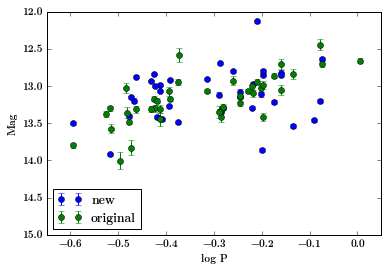

In [6]:
plt.subplots(1,1)
#plt.errorbar(np.log10(df_orig.per), df_orig.mag_avg_3p6, df_orig.merr_avg_3p6.values, fmt='o', label='[3.6]')
plt.errorbar(np.log10(df_orig.per), df_orig.mag_avg_4p5, df_orig.merr_avg_4p5.values, fmt='o', label='new')
plt.errorbar(np.log10(df_orig.per), df_orig.mag_4, df_orig.merr_4.values, fmt='o', label='original')
plt.ylim(15,12)
plt.xlim(-0.65,0.05)
plt.legend(loc=0)
plt.xlabel('log P')
plt.ylabel('Mag')